# Part I - Ford GoBike System Data Exploration
## by Akwayaga Collinus Ajinjue

## Table of Content
1. [Preliminary Wrangling](#pw)
2. [Univariate Exploration](#ue)
3. [Bivariate Exploration](#be)
4. [Multi-variate Exploration](#me)
5. [Conclusions](#c)

## Introduction
> This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset consist of over 183,000 observations and 16 attributes.


<a id="pw"></a>
## Preliminary Wrangling

In [57]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date

%matplotlib inline

In [58]:
# load dataset and show few obsevations
ford_gobike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_gobike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [59]:
# concise summary of dataset
ford_gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [60]:
# descriptive statistics of dataset
ford_gobike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [61]:
# check number of stations in the system
station_params = ['start_station_id','start_station_name','end_station_id','end_station_name']
for station_param in station_params:
    print(ford_gobike_df[station_param].nunique())

329
329
329
329


In [62]:
# check unique values of the user_type, member_gender and bike_share_for_all_trip columns 
cat_columns = ['user_type','member_gender','bike_share_for_all_trip']
for column in cat_columns:
    print(ford_gobike_df[column].unique())

['Customer' 'Subscriber']
['Male' nan 'Other' 'Female']
['No' 'Yes']


In [63]:
# create a copy of dataset
new_gobike_df = ford_gobike_df.copy()
# convert the user_type, member_gender and bike_share_for_all_trip columns  to categorical
for cat_column in cat_columns:
    new_gobike_df[cat_column] = new_gobike_df[cat_column].astype('category')

In [64]:
# confirm type conversion to category - Nominal variables
new_gobike_df[cat_columns].dtypes

user_type                  category
member_gender              category
bike_share_for_all_trip    category
dtype: object

In [65]:
# convert start_time and end_time columns to datetime type
date_columns = ['start_time','end_time']
for date_column in date_columns:
    new_gobike_df[date_column] = pd.to_datetime(new_gobike_df[date_column])

In [66]:
# confirm type conversion to datetime
new_gobike_df[date_columns].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

In [67]:
# Create new features from the start_time column
new_gobike_df['start_month'] = new_gobike_df.start_time.dt.month_name()
new_gobike_df['start_day_of_week'] = new_gobike_df.start_time.dt.day_name()
new_gobike_df['start_hour'] = new_gobike_df.start_time.dt.hour
print(new_gobike_df[['start_month','start_day_of_week','start_hour']].head(), '\n')
print(new_gobike_df[['start_month','start_day_of_week','start_hour']].dtypes)

  start_month start_day_of_week  start_hour
0    February          Thursday          17
1    February          Thursday          18
2    February          Thursday          12
3    February          Thursday          17
4    February          Thursday          23 

start_month          object
start_day_of_week    object
start_hour            int64
dtype: object


In [68]:
# Also, create new feature from end_time column
new_gobike_df['end_month'] = new_gobike_df.end_time.dt.month_name()
new_gobike_df['end_day_of_week'] = new_gobike_df.end_time.dt.day_name()
new_gobike_df['end_hour'] = new_gobike_df.end_time.dt.hour
print(new_gobike_df[['end_month','end_day_of_week','end_hour']].head(), '\n')
print(new_gobike_df[['end_month','end_day_of_week','end_hour']].dtypes)

  end_month end_day_of_week  end_hour
0     March          Friday         8
1     March          Friday         6
2     March          Friday         5
3     March          Friday         4
4     March          Friday         0 

end_month          object
end_day_of_week    object
end_hour            int64
dtype: object


In [69]:
# Convert new features to ordered categorical variables
months = ['February','March']
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
ordinal_var_dict = {'start_month' : months,
                   'start_day_of_week': week_days,
                   'start_hour' : day_hours,
                   'end_month' : months,
                   'end_day_of_week' : week_days,
                   'end_hour' : day_hours
                   }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    new_gobike_df[var] = new_gobike_df[var].astype(ordered_var)

In [70]:
# confirm type conversion
new_columns = ['start_day_of_week','start_hour','end_day_of_week','end_hour']
for new_column in new_columns:
    print(new_gobike_df[new_column].dtype)

category
category
category
category


In [71]:
# determine the age of the riders
new_gobike_df['member_age'] = date.today().year - new_gobike_df['member_birth_year']

In [72]:
# check for duplicate rows 
np.sum(new_gobike_df.duplicated())

0

In [73]:
# check columns with for missing values
new_gobike_df.isnull().sum()[new_gobike_df.isnull().sum() > 0]

start_station_id       197
start_station_name     197
end_station_id         197
end_station_name       197
member_birth_year     8265
member_gender         8265
member_age            8265
dtype: int64

In [74]:
# drop rows with nan values
new_gobike_df = new_gobike_df.dropna()

In [75]:
new_gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### What is the structure of the dataset?

> After the preliminary wrangling, there are 183,412 individual rides in the dataset with 23 features. Out of the 23 features, 10 are quantitative variables, 11 qualitative variables, and 2 are datetime columns.

### What are my main features of interest in the dataset?

> I'm interested in figuring out what features are best for predicting the duration of rides, when the rides were taken/ended in terms of month of the year, day of the week, and time of the day. Also, I will be determining how long the average trip takes. Finally, I will be checking if the latter tasks depend on if a user is a subscriber or customer.

### What features in the dataset do I think will help support my investigation into my features of interest?

>  The following features will help support my investigation into my features of interest:
>  - duration_sec
>  - start_month
>  - start_day_of_week
>  - start_hour
>  - end_month
>  - end_day_of_week
>  -end_hour
>  - user_type
>  - member_age

<a id="ue"></a>
## Univariate Exploration

> In this section, I will investigate distributions of individual variables. If I
see unusual points or outliers, I will take a deeper look to clean things up
and prepare myself to look at relationships between variables

> **How does the distribution of duration_sec look like?**


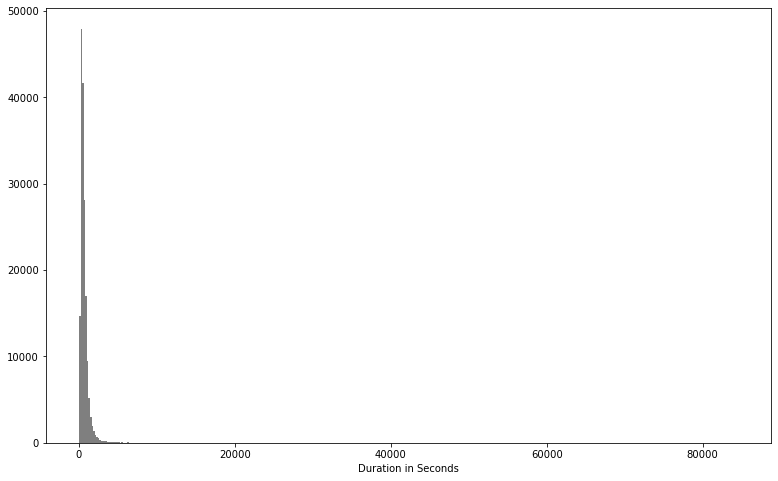

In [76]:
# default color
base_color = sb.color_palette()[7]

# plot histogram for duration_sec 
plt.figure(figsize=(13,8))
bin_size = 200
bin_edges = np.arange(0, new_gobike_df.duration_sec.max()+bin_size, bin_size)
plt.hist(data=new_gobike_df, x='duration_sec', bins=bin_edges, color=base_color)
plt.xlabel('Duration in Seconds');

> There is a long tail to the right in the distribution, so let's put the distribution in a log scale

In [77]:
# new descriptive statistics
np.log10(new_gobike_df.describe())

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age
count,5.242919,5.242919,5.242919,5.242919,5.242919,5.242919,5.242919,5.242919,5.242919,5.242919
mean,2.847574,2.143021,1.577161,NaN,2.135465,1.577163,NaN,3.651529,3.297717,1.570506
std,3.215427,2.047854,-0.998305,-0.929106,2.046634,-0.998719,-0.930723,3.219898,1.005126,1.005126
min,1.785330,0.477121,1.571910,NaN,0.477121,1.571910,NaN,1.041393,3.273696,1.322219
25%,2.509203,1.672098,1.577152,NaN,1.643453,1.577152,NaN,3.579669,3.296665,1.477121
50%,2.707570,2.017033,1.577271,NaN,2.004321,1.577274,NaN,3.695482,3.298198,1.544068
75%,2.897077,2.378398,1.577461,NaN,2.376577,1.577465,NaN,3.740757,3.299289,1.623249
max,4.927103,2.599883,1.578413,NaN,2.599883,1.578413,NaN,3.822495,3.301247,2.158362


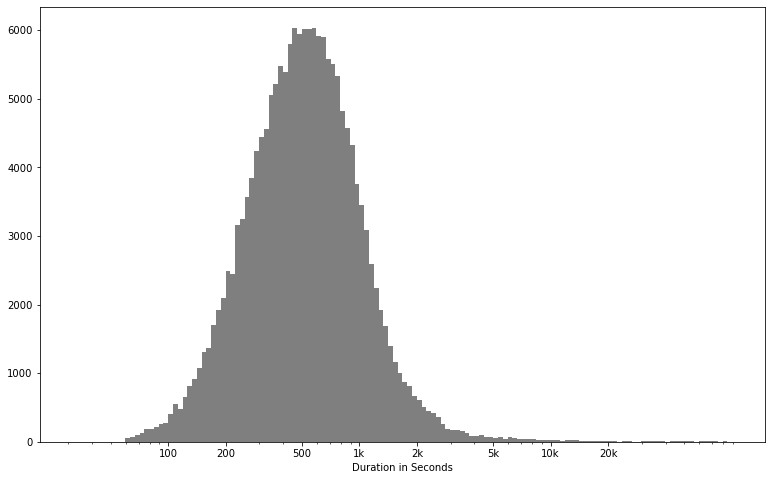

In [78]:
#long tail distribution on a log scale instead
log_binsize = 0.025
bin_edges = 10 ** np.arange(1.5, np.log10(new_gobike_df.duration_sec.max())+log_binsize, log_binsize)
plt.figure(figsize=[13, 8])
plt.hist(data = new_gobike_df, x = 'duration_sec', bins = bin_edges, color=base_color)
plt.xscale('log')
plt.xticks([100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4], [100, 200, 500,'1k','2k','5k','10k','20k'])
plt.xlabel('Duration in Seconds')
plt.show()

> duration_sec has a long-tailed distribution, with a lot of rides on the low duration end, and few on the high duration end. When plotted on a log-scale, the distribution of duration_sec appears to be a normal distribution, with the peak at 500 seconds.

> Next variable of interest: start_month and end_month. **Which month(s) is/are the most popular month for taking and ending rides?**

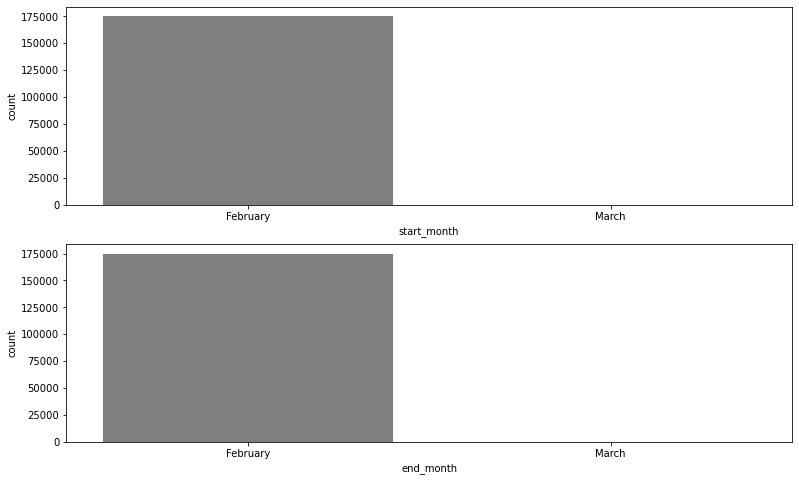

In [79]:
# plotting the distribution of start_month - categorical variable
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.countplot(data=new_gobike_df, x='start_month', color=base_color, ax=ax[0])
sb.countplot(data=new_gobike_df, x='end_month', color=base_color, ax=ax[1]);

In [80]:
# proportions of rides per end_month
round(new_gobike_df.end_month.value_counts(normalize=True), 4) * 100

February    99.99
March        0.01
Name: end_month, dtype: float64

In [81]:
# proportions of rides per start_month
new_gobike_df.start_month.value_counts(normalize=True)

February    1.0
March       0.0
Name: start_month, dtype: float64

> All of the rides in the dataset were taken in the month of February. `99.99%` of the rides ended the same month of February, while `0.01%` ended in the month of March.

> Next variables of interest are start_day_of_week and end_day_of_week. **What days of the week are popular for taking and ending rides?** 

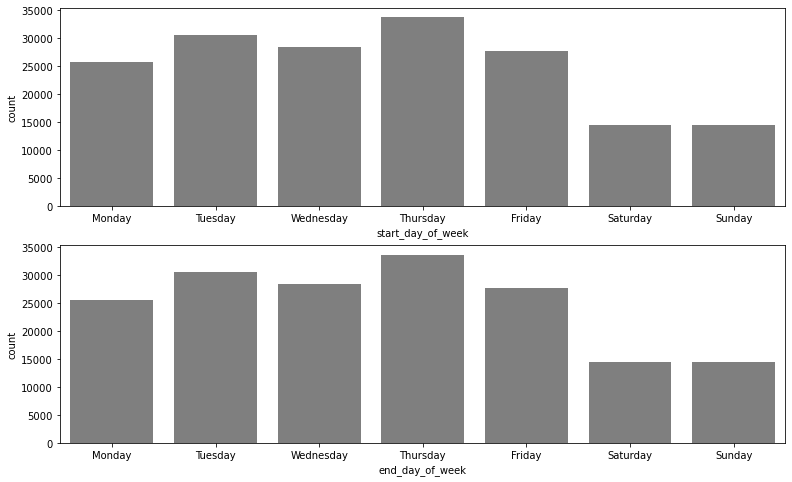

In [82]:
# plot day_of_week's distribution
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.countplot(data=new_gobike_df, x='start_day_of_week', color=base_color, ax=ax[0])
sb.countplot(data=new_gobike_df, x='end_day_of_week', color=base_color, ax=ax[1]);

> Most bike rides were taken and ended on working days; Monday, Tuesday, Wednesday, Thursday and Friday, with Thursday being the most popolar.

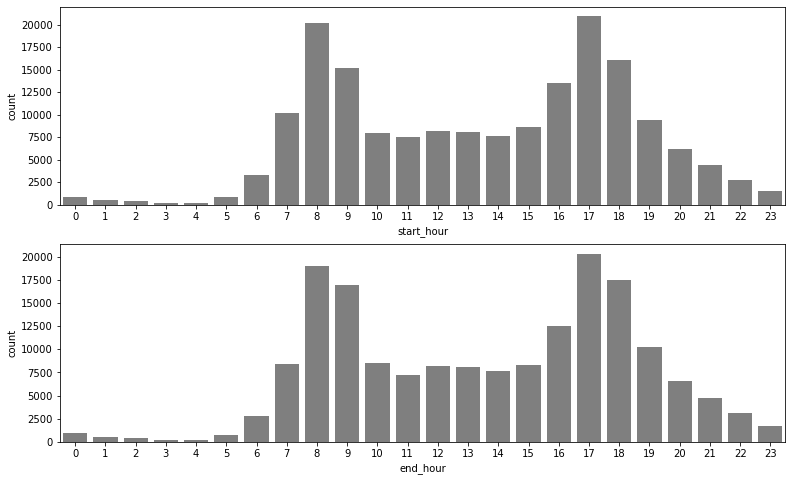

In [83]:
# plot hour's distribution
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.countplot(data=new_gobike_df, x='start_hour', color=base_color, ax=ax[0])
sb.countplot(data=new_gobike_df, x='end_hour', color=base_color, ax=ax[1]);

> The trend for start_hour and end_hour of the rides are similar, with most bike rides taken from 8-9 am and 5-6 pm

In [84]:
# proportions of user types
user_counts = new_gobike_df.user_type.value_counts()
tot_user = new_gobike_df.user_type.value_counts().sum()

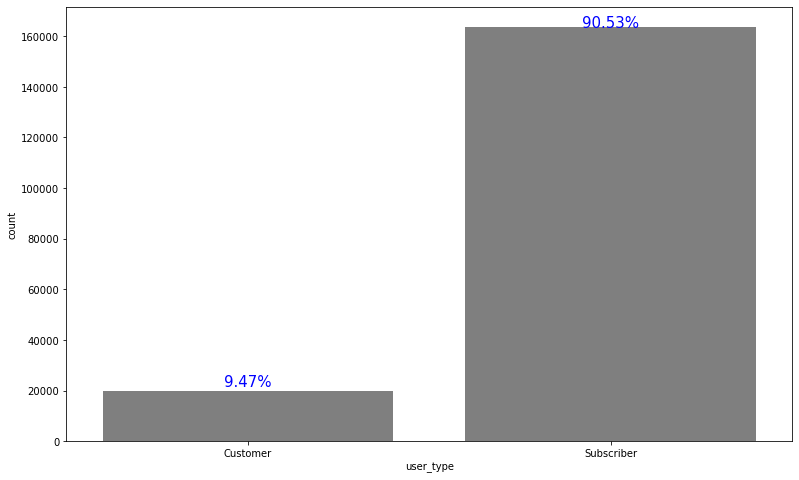

In [85]:
# plot user_type's distribution
plt.figure(figsize=(13,8))
sb.countplot(data=ford_gobike_df, x='user_type', color=base_color)

locs, labels = plt.xticks()

# print proportion text on the bars
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100 * count/tot_user)
    # print the annotation on top of the bars
    plt.text(loc, count+5000, pct_string, ha='center', color='blue', size=15)

> 90.53% of the riders are subscribers and 9.47% are customers.

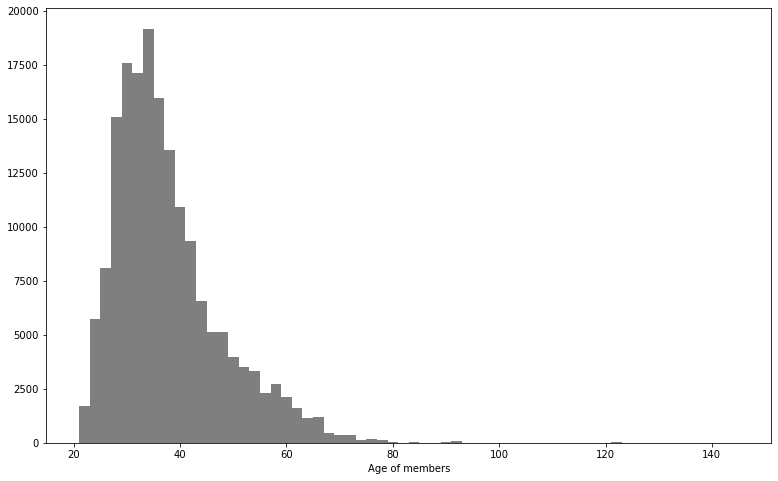

In [86]:
# plot histogram for member_age
plt.figure(figsize=(13,8))
bin_size = 2
bin_edges = np.arange(21, new_gobike_df.member_age.max()+bin_size, bin_size)
plt.hist(data=new_gobike_df, x='member_age', bins= bin_edges, color=base_color)
plt.xlabel('Age of members');

> Ages above 80 seems to be outliers. I will limit the distribution to maximum age of 80.

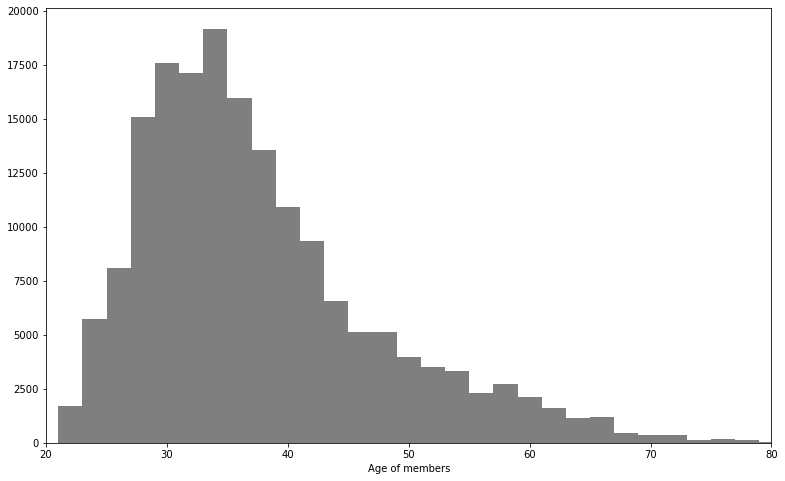

In [87]:
# plot histogram for member_age of maximum 80.
plt.figure(figsize=(13,8))
bin_size = 2
bin_edges = np.arange(21, new_gobike_df.member_age.max()+bin_size, bin_size)
plt.hist(data=new_gobike_df, x='member_age', bins= bin_edges, color=base_color)
plt.xlim((20,80))
plt.xlabel('Age of members');

> The distribution of member_age is unimodal with a peak between ages 30 and 40. It's also skewed to the right.


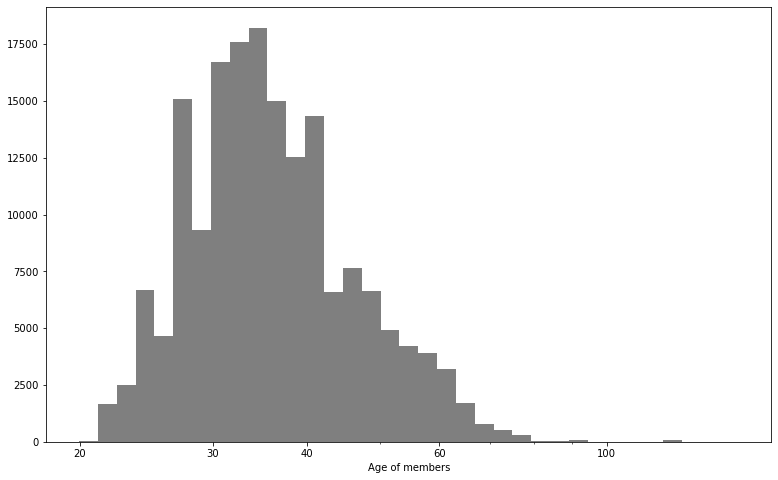

In [88]:
# plot histogram of member_age on log scale 
plt.figure(figsize=(13,8))
log_binsize = 0.025
bin_edges = 10 ** np.arange(1.3, np.log10(new_gobike_df.member_age.max())+log_binsize, log_binsize)
plt.hist(data=new_gobike_df, x='member_age', bins= bin_edges, color=base_color)
plt.xscale('log')
plt.xticks([20, 30, 40, 60, 100],[20, 30, 40, 60, 100])
plt.xlabel('Age of members');

> No definite shape of the member_age distribution. I decided to create age groups from it

In [89]:
# Create age groups
bin_edges = [20, 30, 42, 144]
bin_names = ['Young Adult', 'Middle Adult', 'Senior Adult']
# create the age groups
new_gobike_df['age_group'] = pd.cut(new_gobike_df['member_age'], bin_edges, labels=bin_names)
new_gobike_df.age_group.unique()

['Middle Adult', 'Senior Adult', 'Young Adult']
Categories (3, object): ['Young Adult' < 'Middle Adult' < 'Senior Adult']

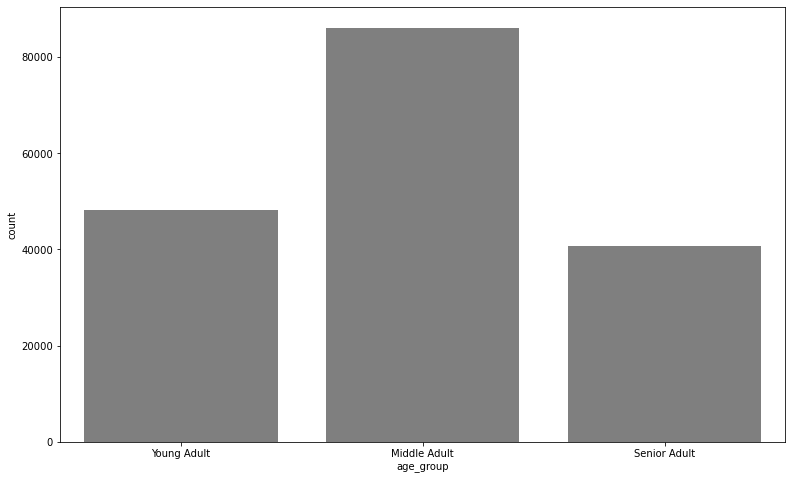

In [90]:
# Count plot of the age groups
plt.figure(figsize=[13,8])
sb.countplot(data=new_gobike_df, x='age_group', color=base_color);

> Most of the riders fall in the Middle Adult age group, that is, between the age of 30 and 42 years old.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_sec variable took a large range of values, so I looked at the data using a log transformation. Under the log transformation, the data looked as a normal distribution with the peak at 500 seconds. Values above 10,000 seems to be insignificant to the distribution and I will remove these from the dataset.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Though the start month and end month distribution appears similar, all the rides begin in the month of February. `99.99%` of the rides end in the month of February and only `0.01%` of the rides end in March. Could it be that the bikes for these rides had issues? The member_age distribution didn't have a definite shape and I saw it uninformative in that state, I decided to apply the pandas cut() operation to create age groups from the data.

In [91]:
# cleaned data set
new_gobike_df = new_gobike_df.query('duration_sec <= 10000')

<a id="be"></a>
## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my 
data. 

> To start off, let me look at the relationship duration_sec and start_day_of_week and end_day_of_week 

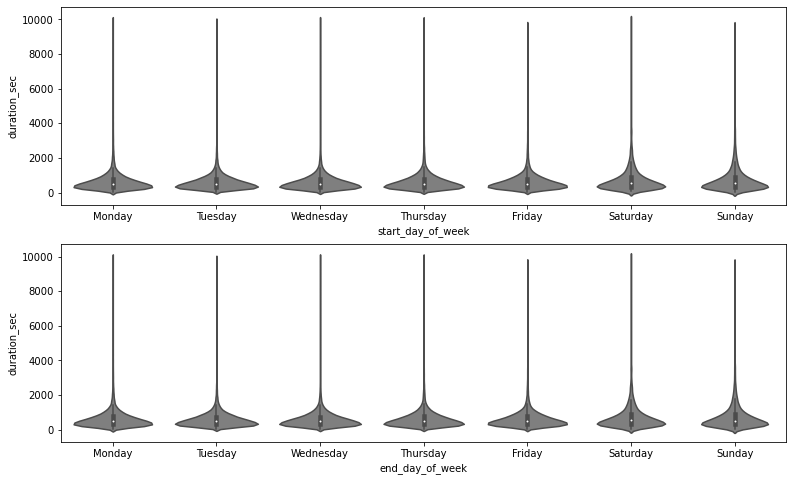

In [92]:
# violin plots 
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.violinplot(data=new_gobike_df, x='start_day_of_week', y='duration_sec', color=base_color, ax=ax[0])
sb.violinplot(data=new_gobike_df, x='end_day_of_week', y='duration_sec', color=base_color, ax=ax[1]);

> The distribution of the duration_sec variable appears similar on all days. The comparison of the median duration for each day is not clear. Let's see how this looks like in a box and bar plot

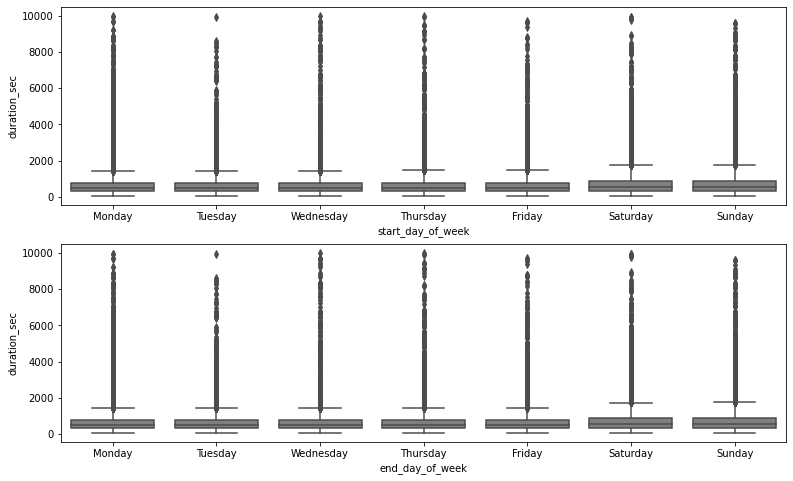

In [93]:
# box plots 
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.boxplot(data=new_gobike_df, x='start_day_of_week', y='duration_sec', color=base_color, ax=ax[0])
sb.boxplot(data=new_gobike_df, x='end_day_of_week', y='duration_sec', color=base_color, ax=ax[1]);

> The box plot reveals a lot of outliers for the duration rides in eadh day of the week; reason I will use the np.median function as the estimator in the barplot. The comparison of the median duration is not also clear. 

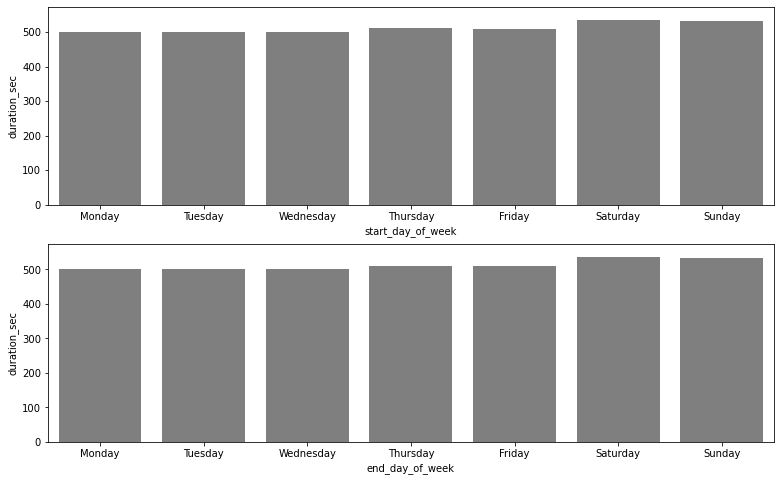

In [94]:
# bar plots 
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.barplot(data=new_gobike_df, x='start_day_of_week', y='duration_sec', color=base_color, ax=ax[0], estimator=np.median, 
           errwidth=0)
sb.barplot(data=new_gobike_df, x='end_day_of_week', y='duration_sec', color=base_color, ax=ax[1], estimator=np.median,
          errwidth=0);

> There is a slight increase in the median duration of rides from Monday to Sunday. This may be clearly seen in a line plot.

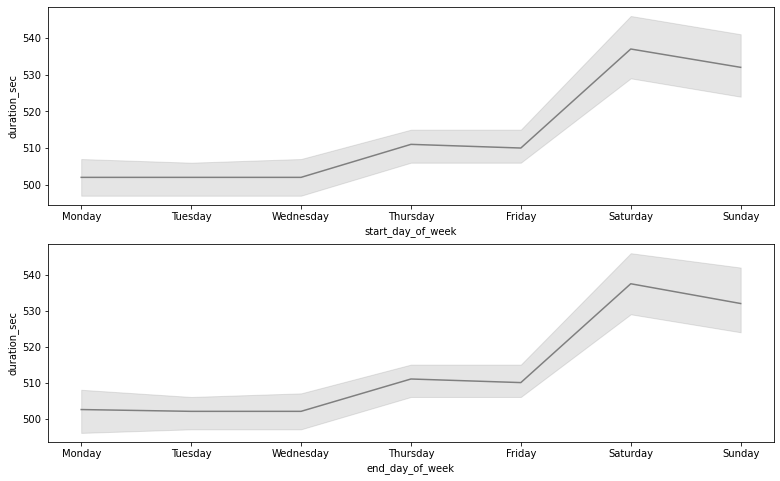

In [95]:
# line plots 
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.lineplot(data=new_gobike_df, x='start_day_of_week', y='duration_sec', color=base_color, ax=ax[0], estimator=np.median)
sb.lineplot(data=new_gobike_df, x='end_day_of_week', y='duration_sec', color=base_color, ax=ax[1], estimator=np.median);

> The gradual increase in the median duration of rides through the days of the week is clearly seen.

> Next, let's the relationship of the duration of rides and start_hour and end_hour

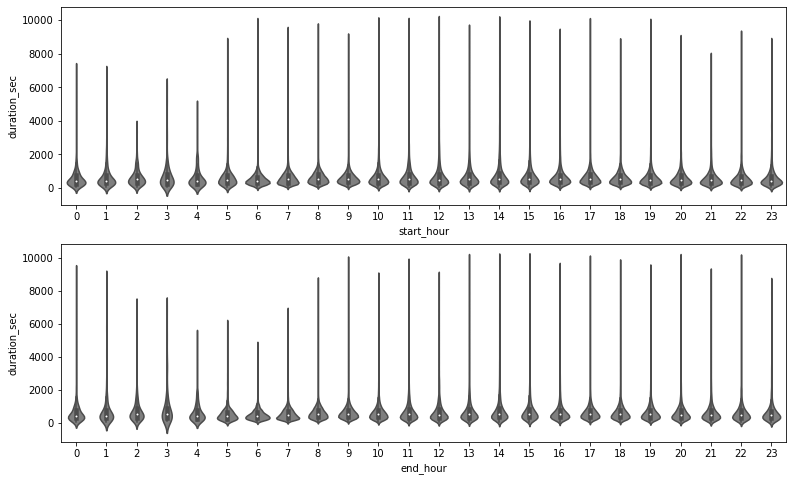

In [96]:
# violin plots 
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.violinplot(data=new_gobike_df, x='start_hour', y='duration_sec', color=base_color, ax=ax[0])
sb.violinplot(data=new_gobike_df, x='end_hour', y='duration_sec', color=base_color, ax=ax[1]);

> The distribution of the duration of rides is unimodal across all the hours of the day. There appears to be lots of outliers.

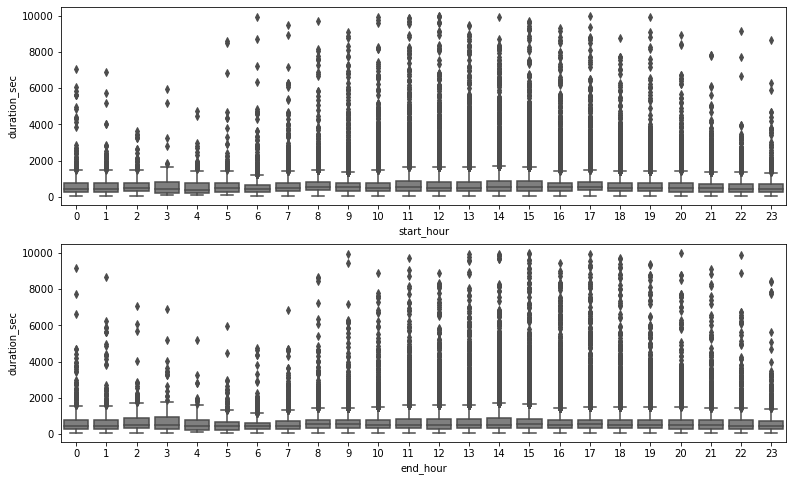

In [97]:
# box plots 
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.boxplot(data=new_gobike_df, x='start_hour', y='duration_sec', color=base_color, ax=ax[0])
sb.boxplot(data=new_gobike_df, x='end_hour', y='duration_sec', color=base_color, ax=ax[1]);

> A lot of outliers of the duration of rides across all hours of the day; reason I will change the estimator to np.median in the bar and line plot below.

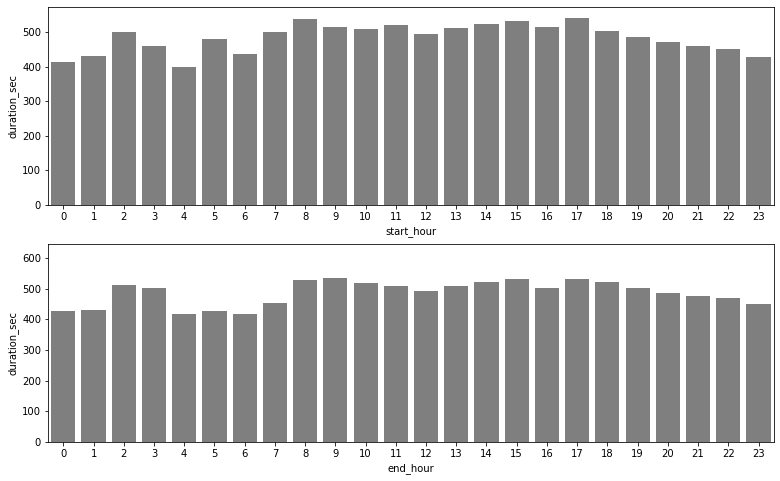

In [98]:
# bar plots 
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.barplot(data=new_gobike_df, x='start_hour', y='duration_sec', color=base_color, ax=ax[0], estimator=np.median,
          errwidth=0)
sb.barplot(data=new_gobike_df, x='end_hour', y='duration_sec', color=base_color, ax=ax[1], estimator=np.median,
          errwidth=0);

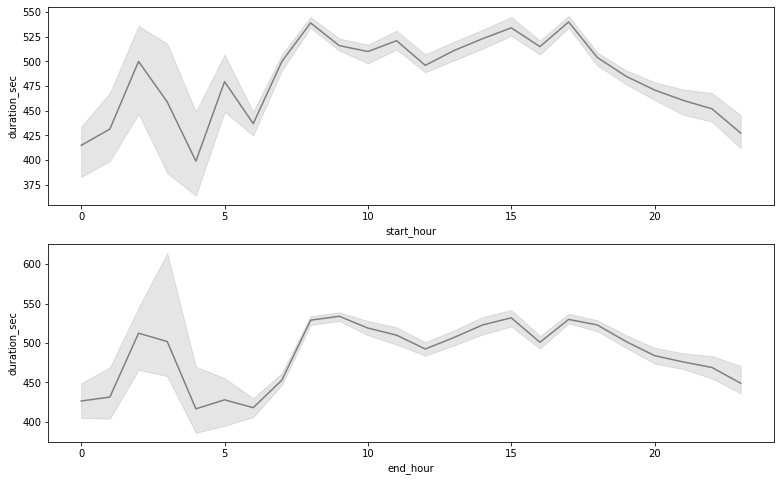

In [99]:
# line plots 
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.lineplot(data=new_gobike_df, x='start_hour', y='duration_sec', color=base_color, ax=ax[0], estimator=np.median)
sb.lineplot(data=new_gobike_df, x='end_hour', y='duration_sec', color=base_color, ax=ax[1], estimator=np.median);

> From midnight to 4:00 am, there is a fall in the median duration of rides, after that the median duration of rides increases till 6:00 pm before it starts falling again.

> Next, I will examine the relationship of duration of rides and the age_group variable.

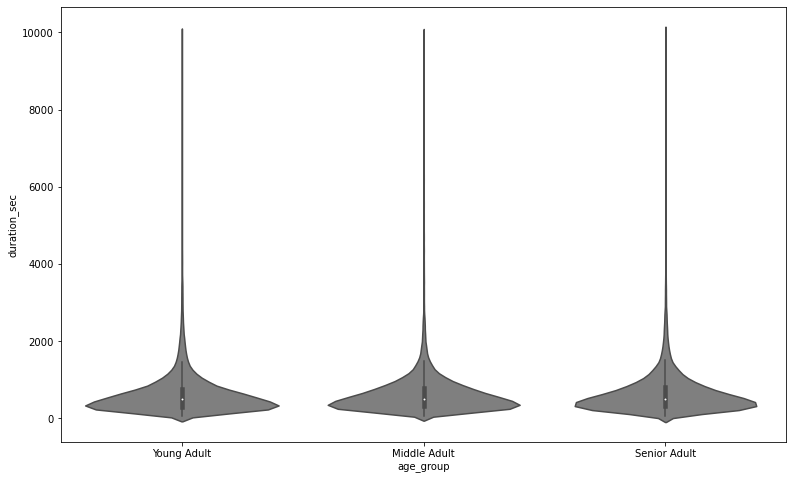

In [100]:
# violin plots 
plt.figure(figsize=[13,8])
sb.violinplot(data=new_gobike_df, x='age_group', y='duration_sec', color=base_color);

> The distribution of duration of rides is similar (unimodal) for all age groups. Also, there appears to be a lot of outliers.

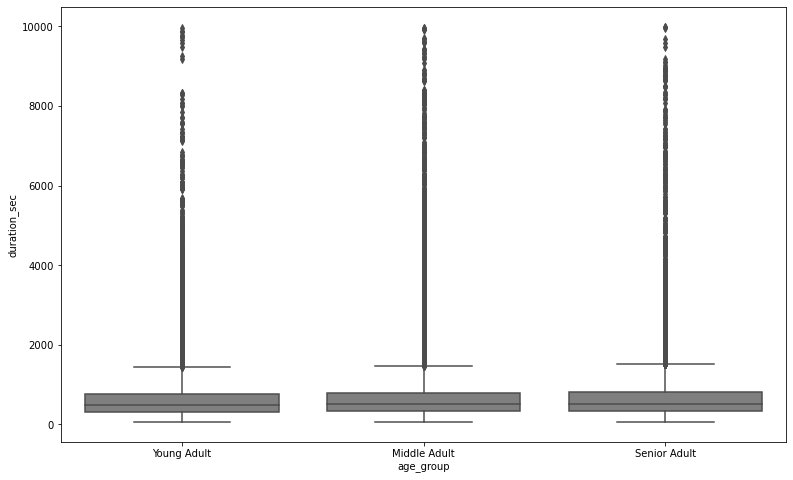

In [101]:
# box plots 
plt.figure(figsize=[13,8])
sb.boxplot(data=new_gobike_df, x='age_group', y='duration_sec', color=base_color);

> This reveals lots of outliers for the duration of rides across all age groups. The comparison of the median duration of rides is not clear yet. I will move to see how the equivalent bar plot appears.

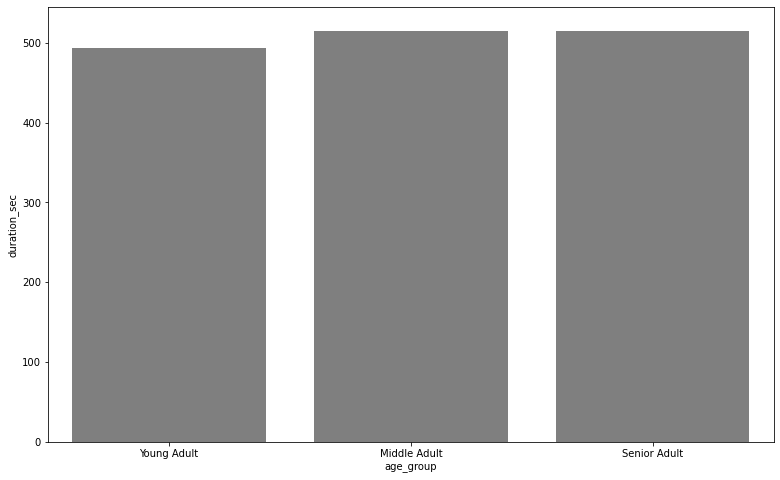

In [102]:
# bar plots 
plt.figure(figsize=[13,8])
sb.barplot(data=new_gobike_df, x='age_group', y='duration_sec', color=base_color, estimator=np.median, errwidth=0);

> It is seen that the median duration of rides is higher with the Middle and Senior Adults than with the Young Adults. That is, people older than 30 years tend to have higher duration of rides.

> Next, let's examine how rides take place among the various age agroups across the days of the week.

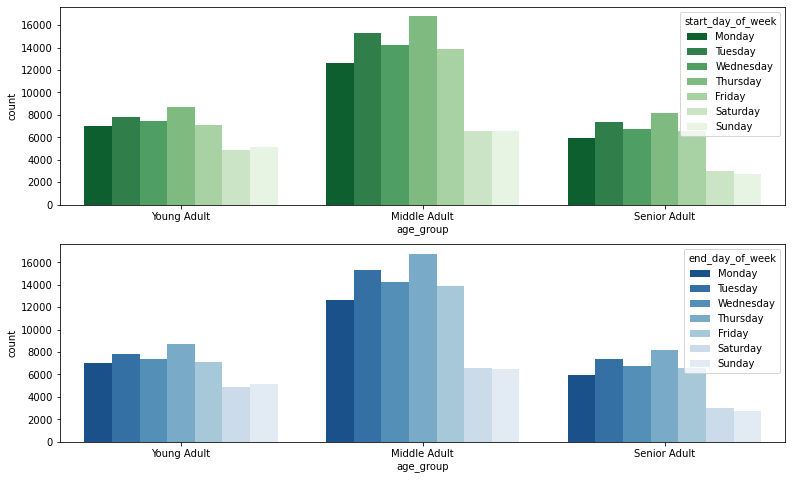

In [103]:
# clustered bar plot
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.countplot(data=new_gobike_df, x='age_group', hue='start_day_of_week', ax=ax[0], palette='Greens_r')
sb.countplot(data=new_gobike_df, x='age_group', hue='end_day_of_week', ax=ax[1], palette='Blues_r');

> Most of the rides are among the Middle Adult age group and they increase across the working days of the week

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I saw a gradual in the median duration of across the days of the week (from Monday to Sunday). This increase was fairly maintained between the 4th and 18th hour of the day. The median duration of rides was also higher for older riders compared to the younger ones.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  But the distribution of age_group vs days of the week shows that a greater majority of the higher median duration of rides was among the Middle Adult rides. That is, riders of the age 30 to 42 years.

> To examine if the patterns above are dependent on whether a rider is a subscriber or customer, I will filter out the dataset for these conditions

In [104]:
# filter out subset of dataframe
new_gobike_df = new_gobike_df.query('(start_hour > 4) & (start_hour < 18) & (end_hour > 4) & \
        (end_hour < 18) & (age_group == "Middle Adult")')

<a id="me"></a>
## Multivariate Exploration

> In this section, I will investigate further the median duration of rides between the 4th and 18th hours, across the days of the week to see if the patterns above are dependent on whether the user type is a Customer or a Subscriber. Also, I will examine the median duration of rides of the most popular age group for each of the user type.

> Now, let's begin with the median duration of rides across the days of the week for each user type

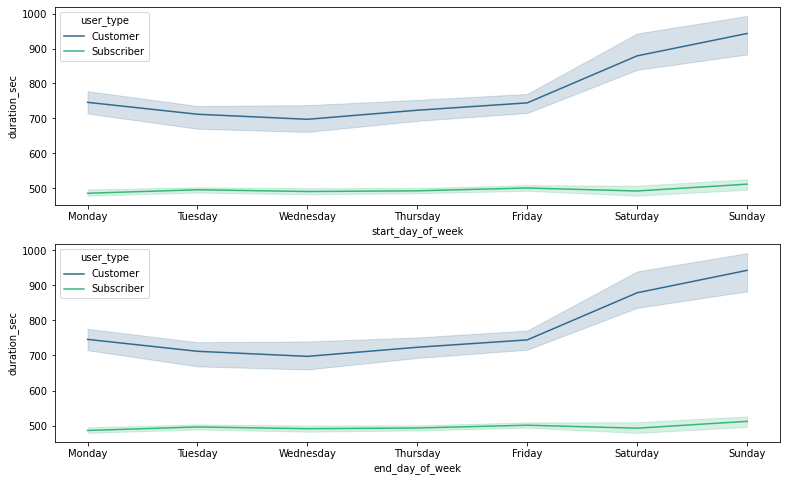

In [105]:
# line plots 
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.lineplot(data=new_gobike_df, x='start_day_of_week', y='duration_sec', color=base_color, ax=ax[0], 
            hue='user_type', palette='viridis', estimator=np.median)
sb.lineplot(data=new_gobike_df, x='end_day_of_week', y='duration_sec', color=base_color, ax=ax[1], 
            hue='user_type', palette='viridis', estimator=np.median);

> The median duration of rides increases across the days of the days of the week for the Customers, but it is almost constant with the Subscribers

> Next, I look at the median duration of rides between the 4th and 18th hour for each user type

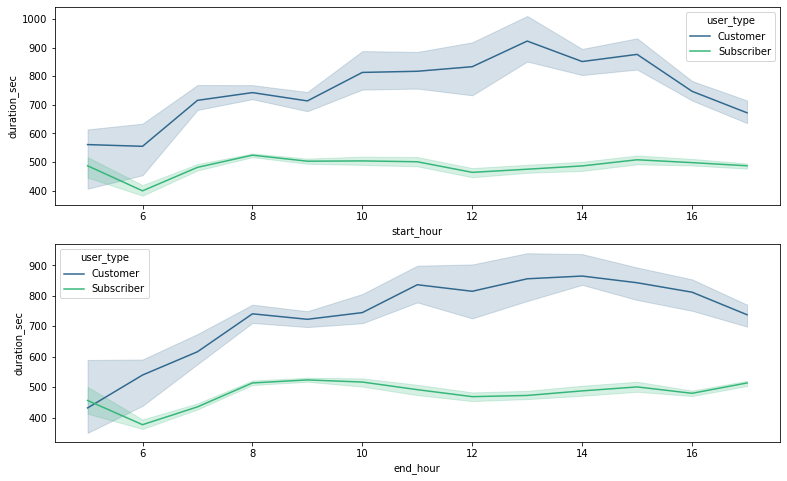

In [106]:
fig, ax = plt.subplots(nrows=2, figsize=[13,8])
sb.lineplot(data=new_gobike_df, x='start_hour', y='duration_sec', color=base_color, ax=ax[0], 
            hue='user_type', palette='viridis', estimator=np.median)
sb.lineplot(data=new_gobike_df, x='end_hour', y='duration_sec', color=base_color, ax=ax[1], 
            hue='user_type', palette='viridis', estimator=np.median);

> Similarly, the median duration of rides increases between the 4th and 18th hours of the day for Customers, but it is fairly constant for the Subscribers

> Finally, I am looking at the median duration of rides of the most popular age group for each user type.

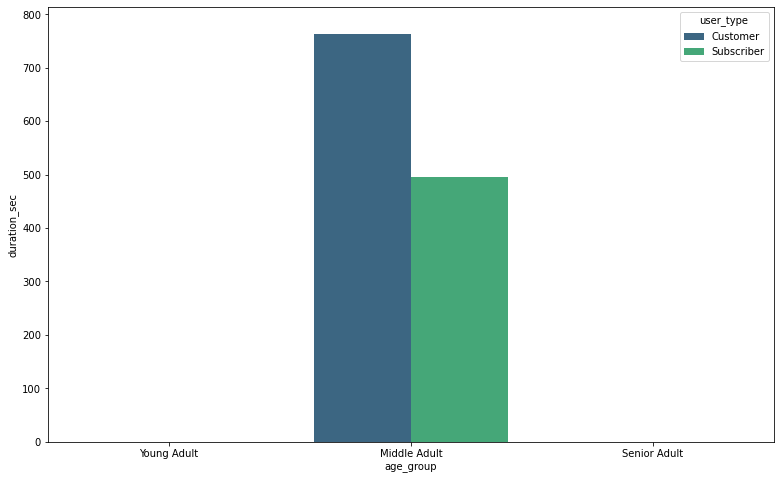

In [107]:
# bar plots 
plt.figure(figsize=[13,8])
sb.barplot(data=new_gobike_df, x='age_group', y='duration_sec', estimator=np.median, hue='user_type', 
            palette='viridis', errwidth=0);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The median duration of rides still increases across the days of the week (from Monday to Sunday) and between the 4th and 18th hour of the day for the Customers. But for Subscribers, it is fairly constant. Even among the Middle Adult age group, the median duration of rides is greater with customers than with subscribers.

### Were there any interesting or surprising interactions between features?

> It's interesting to see that though `90.53%` of the riders are Subscribers, and only `9.47%` are Customers, the median duration of rides increases for Customers more than for Subscibers.

<a id="c"></a>
## Conclusions
The following findings were noticed from the analysis:
> - The distribution of the duration of rides is fairly normal under the log transformation with a peak around 500. That's, the mean duration of rides is about 500 seconds.
> - All the rides were taken in the month of February. `99.99%` of the rides ended in the same month of February, while `0.01%` ended in the month of March.
> - Most of the rides taken and ended on working days (Monday, Tuesday, Wednesday, Thursday, Friday), with Thursday being the most popular day.
> - The highest number of rides were taken from the 8th to 9th hour and the 17th and 18th hour of the day.
> - `90.53%` of the riders are Subscribers and `9.47%` are Customers.
> - Most of the riders are in the **Middle Adult** age group. That is, 30 to 42 years old.
> - The median duration of rides increases gradually through the working days of the week. It experienced a swift rise on Saturdays.
> - The median duration of rides decrease from midnight to `4:00 am`, then it increases till the 18th hour before it falls again.
> - The median duration of rides increases across the days of the week (from Monday to Sunday) and between the 4th and 18th hour of the day for the Customers. But for Subscribers, it is fairly constant. Even among the Middle Adult age group, the median duration of rides is greater with customers than with subscribers.
